# Tarea 6

Nombre:  **Nombre Apellido Apellido** 

x/10/2020

## Repaso

Estudia detenidamente el capítulo de arrays (notebook [numpy.ipynb](numpy.ipynb)). (Los apartados con asterisco pueden saltarse en una primera lectura.) En [este notebook](dist.ipynb) se hay otro breve repaso.

## Ejercicios

Resuelve los siguientes ejercicios, usando únicamente los conceptos explicados en clase hasta ahora.

**1**) Resuelve el sistema:

$$ 
\begin{align*}
x + 2y + 5z + 4w&= 24\\
y-z  &= 1 \\
2x+2y &= 6 \\
-x+2y+3w &= 15
\end{align*}
$$

Simplemente hay que crear la matriz de coeficientes y el término independiente y aplicar la función `numpy.linalg.solve`.

In [1]:
import numpy as np

A = np.array([[1,2,5,4],
              [0,1,-1,0],
              [2,2,0,0],
              [-1,2,0,3]])

B = np.array([[24],
              [1],
              [6],
              [15]])

In [2]:
X = np.linalg.solve(A,B)
X

array([[ 2.00000000e+00],
       [ 1.00000000e+00],
       [-7.10542736e-16],
       [ 5.00000000e+00]])

Siempre es conveniente comprobar que la solución efectivamente resuelve el sistema.

In [3]:
A @ X

array([[24.],
       [ 1.],
       [ 6.],
       [15.]])

El término independiente se puede expresar también como un array 1D. En este caso los vectores X y B se muestran como "filas".

El sistema se puede resolver también haciendo $x = A^{-1} B$, utilizando `np.linalg.inv`, pero es mejor utilizar `np.linalg.solve`.

Si en vez de usar np.array creamos las matrices con `np.matrix` entonces los operadores aritméticos realizan operaciones matriciales (no "elemento a elemento") y la solución se obtendría con `x=A**(-1) * B`. De nuevo se recomienda no hacer esto.

<hr style="height:2px">

**2**) Resuelve el sistema de ecuaciones lineales $Ax=b$ cuya matriz de coeficientes $A$ y vector $b$ están almacenados en un fichero de texto plano situado en  http://robot.inf.um.es/material/datos-SL.txt que puedes leer con `np.loadtxt`. En este fichero hay un array de dimensiones 10x11.  Las 10 primeras columnas contienen los elementos de $A$ y la última columna es $b$.

In [4]:
import numpy as np

datos = np.loadtxt('http://robot.inf.um.es/material/datos-SL.txt')

# todas las filas, primeras 10 columnas (de 0 a 9)
A = datos[:, :10]

# todas las filas, última columna
b = datos[:, -1]

x = np.linalg.solve(A,b)

x

array([ 1.00000000e+00,  3.00000000e+00, -2.00000000e+00, -2.00000000e+00,
       -3.00000000e+00,  2.00000000e+00,  3.12322606e-16, -3.00000000e+00,
        2.00000000e+00, -2.00000000e+00])

In [5]:
np.linalg.norm( A@x - b )

1.6898746926621696e-14

<hr style="height:2px">

**3**) Define una función para calcular la letra del DNI ([aquí explican la forma de hacerlo](http://www.cespedes.org/dni2nif/)).

In [6]:
def letra_dni(dni):
    letras = 'TRWAGMYFPDXBNJZSQVHLCKE'
    return letras[ dni % 23 ]

letra_dni(50345118)

'G'

<hr style="height:2px">

**4**) Escribe una función para calcular la desviación típica de un conjunto de números apoyándote en `np.mean`.

Preparamos unos datos de comprobación

In [7]:
a = np.random.randint(0,10,10)
a

array([4, 6, 3, 4, 4, 2, 7, 1, 4, 3])

Y vemos lo que tiene que responder nuestra función:

In [8]:
np.std(a)

1.661324772583615

Una primera versión calcula la media de los cuadrados de las desviaciones respecto a la media, y usa variables locales para ir guardando resultados intermedios:

In [9]:
def desvi(v):
    m = np.mean(v)
    d = (v-m)**2
    v = np.mean(d)
    return np.sqrt(v)

desvi(a)

1.661324772583615

La siguiente versión es más elegante:

In [10]:
def desvi(v):
    return np.sqrt( np.mean(v**2) - np.mean(v)**2 )

desvi(a)

1.6613247725836149

<hr style="height:2px">

**5**) Define una función que encuentre el segundo mayor elemento de un array de enteros. (Por ejemplo, si llamamos `segun` a la función pedida, y `x = np.array( [1, 3, 2, 10, -5, 8, 3] )`, entonces `segun(x)` debe responder `8`.

In [11]:
def segun(v):
    return np.max( v[ v < np.max(v) ] )

In [12]:
x = np.array( [1, 3, 2, 10, -5, 8, 3] )

segun(x)

8

In [13]:
def segun(v):
    m         = np.max(v)
    mask      = v < m
    otros     = v[mask]
    resultado = np.max(otros)
    return resultado

segun(x)

8

También sería correcto ordenar el array y coger el penúltimo elemento, pero es matar moscas a cañonazos.

In [14]:
sorted(x)[-2]

8

En el enunciado no se especifica lo que debe responder la función cuando el máximo elemento está repetido. Hay que tomar una decisión y comprobar que la función construida resuelve esas situaciones como nosotros queremos.

<hr style="height:2px">

**6**) A partir de los datos experimentales contenidos en `datos/hubble.txt` calcula el valor medio de redshift de las observaciones con velocidad < 5000 Km/s. (El archivo está en la subcarpeta datos de estos apuntes y la forma de leer estos datos está explicada en el notebook numpy.ipybn.)

In [15]:
# Abre el archivo para comprobar que tiene una "cabecera"
# y qué variable es cada columna.

# Asegúrate también de que se leen las 33 medidas
medidas = np.loadtxt('datos/hubble.txt',skiprows=2)

medidas.shape

(33, 3)

In [16]:
#Podemos separar las columnas así:

vel = medidas[:,0]
rs  = medidas[:,1]
mag = medidas[:,2]

In [17]:
# pero esto es más cómodo:

vel, rs, mag = medidas.T

In [18]:
np.mean( rs[ vel<5000 ] )

0.007293428571428571

<hr style="height:2px">

**7**) Escribe una función que admita un array 2D $m$ y un escalar $s$ y extraiga las columnas de $m$ cuya suma sea mayor de un cierto $s$ dado.

In [19]:
def bigcols(m,s):
    sc   = np.sum(m, axis=0)
    mask = sc > s
    return m[:, mask]

In [20]:
# preparamos un array 2D de prueba

a = np.random.randint(0,10,(5,10))
a

array([[7, 8, 1, 4, 0, 5, 9, 3, 5, 7],
       [7, 6, 1, 1, 9, 4, 6, 4, 6, 4],
       [6, 5, 4, 4, 1, 5, 8, 6, 0, 7],
       [4, 4, 6, 3, 1, 8, 0, 2, 8, 6],
       [6, 0, 5, 7, 3, 2, 6, 5, 2, 7]])

In [21]:
bigcols(a, 25)

array([[7, 9, 7],
       [7, 6, 4],
       [6, 8, 7],
       [4, 0, 6],
       [6, 6, 7]])

<hr style="height:2px">

**8)** Genera $n$ números aleatorios normales y compara gráficamente su histograma con la densidad de probabilidad real.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

n = 1000
s = np.random.randn(n)
plt.hist(s, density=True);

x = np.linspace(-4,4,100)
plt.plot(x, norm.pdf(x));

<hr style="height:2px">

**9**) Simula el lanzamiento de 5 dados mil veces, y comprueba gráficamente que la distribución de resultados de la puntuación total es aproximadamente normal.

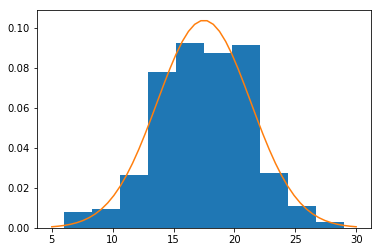

In [23]:
dados = np.random.randint(1,6+1,(1000,5))
total = np.sum(dados,axis=1)
plt.hist(total, density=True);
m = np.mean(total)
s = np.std(total)
x = np.linspace(5,30)
plt.plot( x, norm.pdf(x,m,s) );

<hr style="height:2px">

**10)** Determina mediante simulación qué suceso es más probable: **a)** obtener al menos un seis al lanzar 6 dados, **b)** obtener al menos 2 seises al lanzar 12 dados. **c)** obtener al menos 3 seises al lanzar 18 dados. ([Problema de Newton-Pepys](https://en.wikipedia.org/wiki/Newton%E2%80%93Pepys_problem).)

In [24]:
# para cada experimento, con np.random.randint puedes generar una matriz
# de n filas (número de repeticiones) y d columnas (número de dados)

# Una pista:

m = np.array([[2,3,4],
              [1,2,5],
              [3,3,1]])

np.sum(m==3, axis=1)

array([1, 0, 2])

In [25]:
def exper(numdados, ganar, repeticiones):
    x = np.random.randint(1,7,(repeticiones, numdados))
    seises = np.sum(x==6, axis=1)
    return np.mean( seises >= ganar )

In [26]:
exper(6,1,1000000)

0.664962

In [27]:
exper(12,2,1000000)

0.619482

In [28]:
exper(18,3,1000000)

0.595796

Recuerda que numpy convierte los valores lógicos de una máscara en unos y ceros en las operaciones aritméticas.

<hr style="height:2px">

**11**) Escribe una función para calcular la distancia entre dos puntos de $\mathbb R^n$.

Está resuelto en el  [notebook de repaso](dist.ipynb) indicado al principio.

<hr style="height:2px">

**12**) Escribe una función para calcular el [producto vectorial](http://en.wikipedia.org/wiki/Cross_product) de dos vectores.

In [29]:
# lo más sencillo aquí es escribir explícitamente los componentes

def cross(p,q):
    x1,y1,z1 = p
    x2,y2,z2 = q
    return np.array([ y1*z2-y2*z1, x2*z1-x1*z2, x1*y2-x2*y1])

In [30]:
u = (1,3,5)
v = (5,4,-2)

cross(u,v)

array([-26,  27, -11])

In [31]:
# comprobamos con numpy

np.cross(u,v)

array([-26,  27, -11])

<hr style="height:2px">

**13**) Escribe una función para calcular los coeficientes $l=(a,b,c)$, de la ecuación de la recta $ax+by+c=0$ que pasa por dos puntos $P=(x_1,y_1)$, $Q=(x_2,y_2)$ dados.

In [32]:
# suponemos que la recta no es completamente vertical
def recta(p,q):
    x1,y1 = p
    x2,y2 = q
    A = np.array([[x1,1],
                  [x2,1]])
    B = y1,y2
    
    m,b = np.linalg.solve(A,B)
    
    return m,-1,b

In [33]:
R = (1,3)
S = (5,4)

l = recta(R,S)

l

(0.25, -1, 2.75)

In [34]:
l @ np.append(R,1), l @ np.append(S,1)

(0.0, 0.0)

Hay que añadir una condición para resolver el caso vertical. (En realidad hay una forma más general de hacer esto utilizando coordenadas homogéneas...)

<hr style="height:2px">

**14**) Escribe una función para calcular el punto de intersección de dos rectas con coeficientes $l=(a,b,c)$ y  $l'=(a',b',c')$.

<hr style="height:2px">

**15**) Escribe una función para ordenar un array de enteros de menor a mayor.

<hr style="height:2px">

**16)** Un polinomio $p(x)$ de grado $n$ se puede representar mediante un vector de coeficientes de dimensión $n+1$. Escribe funciones para: **a)** calcular (los coeficientes de) la derivada del polinomio. **b)** calcular (los coeficientes de) la integral del polinomio. **c)** evaluar un polinomio en un valor concreto de $x$. **d)** multiplicar dos polinomios.